In [5]:
# Analyze Tennessee school stats to identify reasons for underperformance

# After Lit review need to analyze data from web scrape

import pandas as pd

df = pd.read_csv('/Users/RoscoeBColtrane/Documents/GitHub/LearnDataSci/Essential Statistics/middle_tn_schools.csv')
# describe the data
df.describe()


,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
count,347.000000,347.000000,347.000000,347.000000,341.000000,347.000000,341.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,2.968300,699.472622,50.279539,58.801729,58.249267,15.461671,57.004692,57.049856,44.939481,21.197983,61.673487,2.642651,11.164553
std,1.690377,400.598636,25.480236,32.540747,32.702630,5.725170,26.696450,27.968974,22.053386,23.562538,27.274859,3.109629,12.030608
min,0.000000,53.000000,2.000000,0.200000,0.600000,4.700000,1.500000,0.100000,2.000000,0.000000,1.100000,0.000000,0.000000
25%,2.000000,420.500000,30.000000,30.950000,27.100000,13.700000,37.600000,37.000000,30.000000,3.600000,40.600000,0.750000,3.800000
50%,3.000000,595.000000,51.000000,66.400000,65.800000,15.000000,61.800000,60.700000,40.000000,13.500000,68.700000,1.600000,6.400000
75%,4.000000,851.000000,71.500000,88.000000,88.600000,16.700000,79.600000,80.250000,54.000000,28.350000,85.950000,3.100000,13.800000
max,5.000000,2314.000000,98.000000,99.800000,99.800000,111.000000,99.000000,98.900000,140.000000,97.400000,99.700000,21.100000,65.200000


In [18]:
####  THIS IS AN AWESOME WAY TO VISUALIZE BASIC STATS QUICKLY!!!!###

df[['reduced_lunch','school_rating']]\
    .groupby(['school_rating'])\
    .describe()  # transposes data to make more readable 
#    .unstack()  # unstack is unecessary now


reduced_lunch                                                  \
                      count       mean        std   min    25%   50%    75%   
school_rating                                                                 
0.0                    43.0  83.581395   8.813498  53.0  79.50  86.0  90.00   
1.0                    40.0  74.950000  11.644191  53.0  65.00  74.5  84.25   
2.0                    44.0  64.272727  11.956051  37.0  54.75  62.5  74.00   
3.0                    56.0  50.285714  13.550866  24.0  41.00  48.5  63.00   
4.0                    86.0  41.000000  16.681092   4.0  30.00  41.5  50.00   
5.0                    78.0  21.602564  17.651268   2.0   8.00  19.0  29.75   

                     
                max  
school_rating        
0.0            98.0  
1.0            98.0  
2.0            88.0  
3.0            78.0  
4.0            87.0  
5.0            87.0

In [20]:
df[['reduced_lunch' ,'school_rating']].corr()

,reduced_lunch,school_rating
reduced_lunch,1.000000,-0.815757
school_rating,-0.815757,1.000000


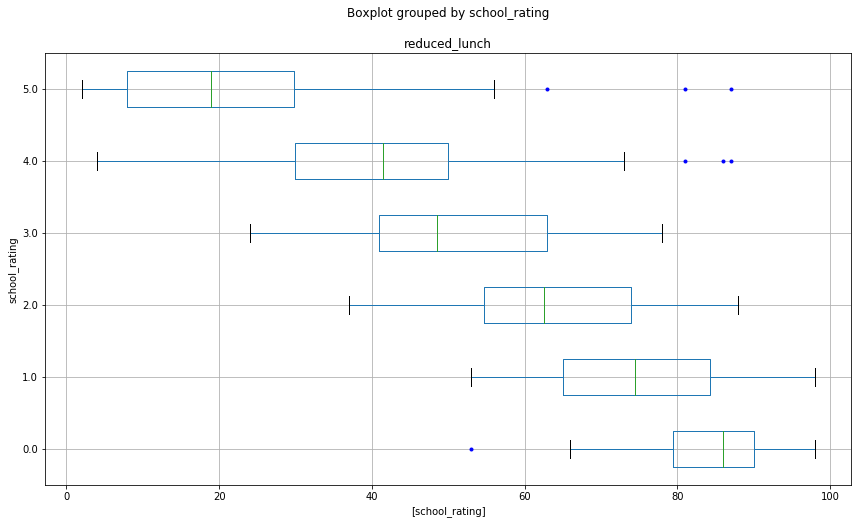

In [43]:
# plotting reduced_lunch to see distributions

#  a box-and-whisker plot. A box-and-whisker plot is helpful 
#  for visualizing the distribution of the data from the mean. 

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14,8))   # figure size
ax = fig.add_subplot(111)          #  axis information
ax.set_ylabel('school_rating')     #   sets label for y-axis'

# boxplot with only these two variables
_ = df[['reduced_lunch', 'school_rating']].boxplot(by='school_rating',\
        figsize=(13,8), vert=False, sym='b.', ax=ax)

In [29]:
# the minimum and maximum reduced_lunch values tend to get closer 
# to the mean as school_rating decreases; that is, 
# as school_rating decreases so does the standard deviation in reduced_lunch.

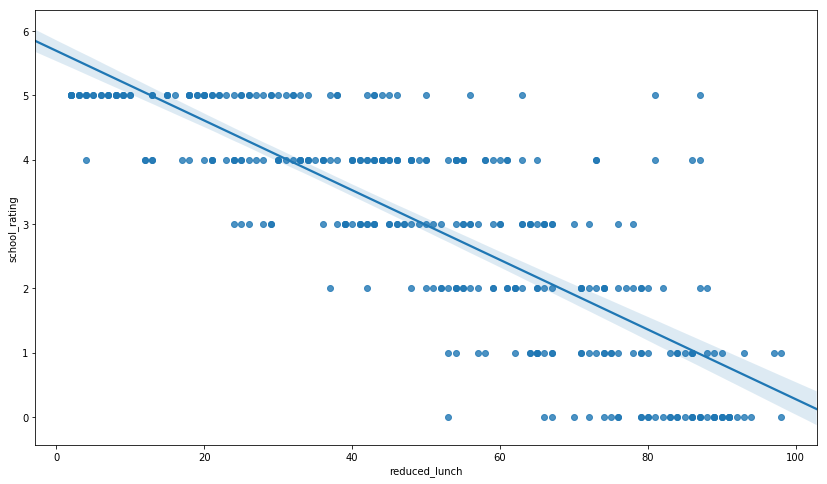

In [39]:
# Scatter plot to further examine
plt.figure(figsize=(14,8))   # set size of the graph
_ = sns.regplot(data=df, x='reduced_lunch', y='school_rating')

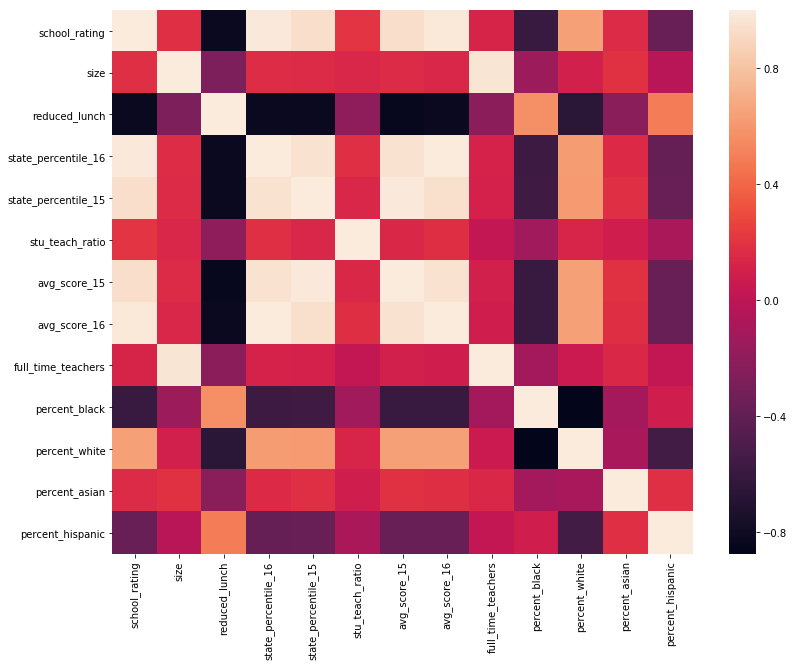

In [46]:
#  Create tabular CORRELATION MATRIX for better visibility 

corr = df.corr()
_, ax = plt.subplots(figsize=(13,10))

#  graph correlation matrix
_ = sns.heatmap(corr, ax=ax, xticklabels = corr.columns.values,
                yticklabels = corr.columns.values)

In [ ]:
#  Developed a hypothesis: a negative relationship exists between 
#  school_rating and reduced_lunch